In [1]:
import numpy as np

data = [[5, 7], [8, 3], [1, 6], [6, 9], [4, 4], [4, 9], [7, 3]]
eps = 3.5
minPts = 3

distances = []
for i in range(len(data)):
    botList = []
    for j in range(len(data)):
        d = (((data[i][0] - data[j][0]) ** 2) + (data[i][1] - data[j][1]) ** 2) ** 0.5
        botList.append(round(d, 3))
    distances.append(botList)

# Convert the distances 2D list to a NumPy array
distances_array = np.array(distances)
print(distances_array)



points = []
for i in range(len(data)):
    inPoint = [i + 1]
    for j in range(len(data)):
        if i == j:
            continue
        if distances[i][j] <= eps:
            inPoint.append(j + 1)
    points.append(inPoint)

print(points)

# table - 1

table1 = []
for i in range(len(data)):
    inTable1 = []
    inTable1.append(i + 1)
    if ( len( points[i]) >= minPts ):
        inTable1.append("Core")
    else:
        inTable1.append("Noise")
    table1.append(inTable1)
print(table1)


# table - 2


border = []
for i in range(len(points)):
    # check if i + 1 is core
    if table1[i][1] == 'Core':
        # check if remaining are noise
        for j in range(1, len(points[i])):
            # check if that point is Noise or not
            for k in range(len(table1)):
                if (points[i][j] == table1[k][0] ) and (table1[k][1] == 'Noise'):
                    border.append(j + 1)
table2 = table1

for i in range(len(border)):
    table2[border[i] - 1][1] = 'Border'
print(table2)


[[0.    5.    4.123 2.236 3.162 2.236 4.472]
 [5.    0.    7.616 6.325 4.123 7.211 1.   ]
 [4.123 7.616 0.    5.831 3.606 4.243 6.708]
 [2.236 6.325 5.831 0.    5.385 2.    6.083]
 [3.162 4.123 3.606 5.385 0.    5.    3.162]
 [2.236 7.211 4.243 2.    5.    0.    6.708]
 [4.472 1.    6.708 6.083 3.162 6.708 0.   ]]
[[1, 4, 5, 6], [2, 7], [3], [4, 1, 6], [5, 1, 7], [6, 1, 4], [7, 2, 5]]
[[1, 'Core'], [2, 'Noise'], [3, 'Noise'], [4, 'Core'], [5, 'Core'], [6, 'Core'], [7, 'Core']]
[[1, 'Core'], [2, 'Border'], [3, 'Noise'], [4, 'Core'], [5, 'Core'], [6, 'Core'], [7, 'Core']]


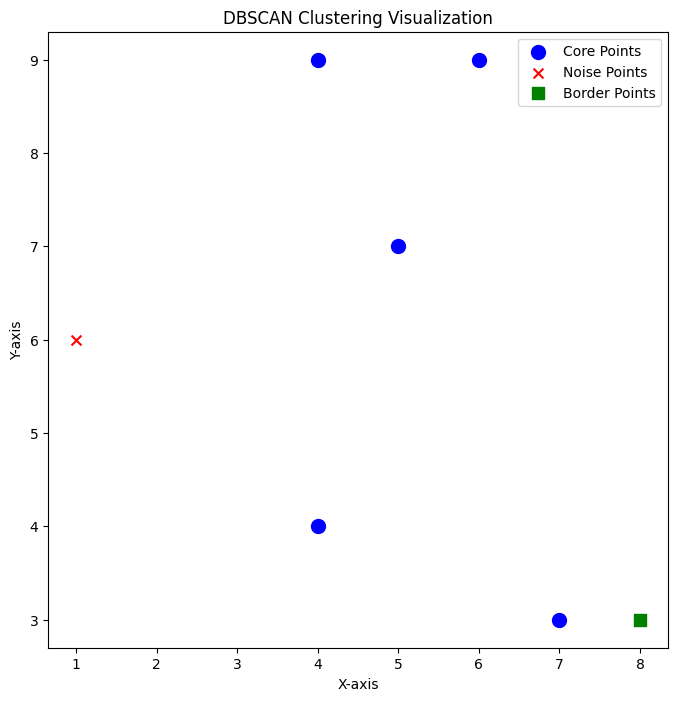

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = [[5, 7], [8, 3], [1, 6], [6, 9], [4, 4], [4, 9], [7, 3]]
eps = 3.5
minPts = 3

# Create a scatter plot to visualize the points
plt.figure(figsize=(8, 8))

# Extract core, noise, and border points for visualization
core_points = [data[i] for i in range(len(table2)) if table2[i][1] == 'Core']
noise_points = [data[i] for i in range(len(table2)) if table2[i][1] == 'Noise']
border_points = [data[i] for i in range(len(table2)) if table2[i][1] == 'Border']

# Scatter plot for core points
core_x, core_y = zip(*core_points)
plt.scatter(core_x, core_y, color='blue', label='Core Points', s=100, marker='o')

# Scatter plot for noise points
noise_x, noise_y = zip(*noise_points)
plt.scatter(noise_x, noise_y, color='red', label='Noise Points', s=50, marker='x')

# Scatter plot for border points
border_x, border_y = zip(*border_points)
plt.scatter(border_x, border_y, color='green', label='Border Points', s=75, marker='s')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('DBSCAN Clustering Visualization')
plt.legend()

# Display the plot
plt.show()


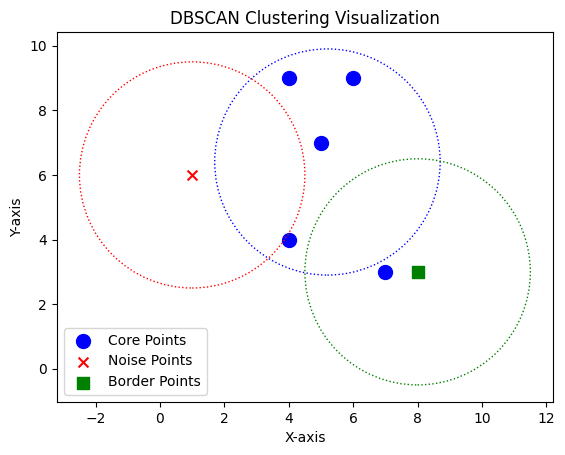

In [4]:

from matplotlib.patches import Circle

# Extract core, noise, and border points for visualization
core_points = [data[i] for i in range(len(table2)) if table2[i][1] == 'Core']
noise_points = [data[i] for i in range(len(table2)) if table2[i][1] == 'Noise']
border_points = [data[i] for i in range(len(table2)) if table2[i][1] == 'Border']

# Scatter plot for core points
core_x, core_y = zip(*core_points)

# Scatter plot for noise points
noise_x, noise_y = zip(*noise_points)

# Scatter plot for border points
border_x, border_y = zip(*border_points)

# Create a scatter plot for core points
plt.scatter(core_x, core_y, color='blue', label='Core Points', s=100, marker='o')

# Create a scatter plot for noise points
plt.scatter(noise_x, noise_y, color='red', label='Noise Points', s=50, marker='x')

# Create a scatter plot for border points
plt.scatter(border_x, border_y, color='green', label='Border Points', s=75, marker='s')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('DBSCAN Clustering Visualization')
plt.legend()

# Plot circles around core, noise, and border points
circle_radius = eps
core_circle = Circle((np.mean(core_x), np.mean(core_y)), circle_radius, fill=False, color='blue', linestyle='dotted', linewidth=1)
noise_circle = Circle((np.mean(noise_x), np.mean(noise_y)), circle_radius, fill=False, color='red', linestyle='dotted', linewidth=1)
border_circle = Circle((np.mean(border_x), np.mean(border_y)), circle_radius, fill=False, color='green', linestyle='dotted', linewidth=1)

plt.gca().add_patch(core_circle)
plt.gca().add_patch(noise_circle)
plt.gca().add_patch(border_circle)

# Display the plot
plt.show()
